<a href="https://colab.research.google.com/github/meoowqt/pythonDataLab/blob/main/LW5_classification_Vechkanova_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа #5: Построение и обучение модели классификации

In [ ]:
import numpy as np
import sklearn

###Задание 1
Загрузить в pandas любой датасет, имеющий минимум 3 вещественных и 1 категориальный признак (число категорий должно быть значительно меньше числа строк в датасете)

In [ ]:
import pandas as pd

df = pd.read_excel('banana (2).xlsx')
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


###Задание 2
2.1 Выполнить нормализацию признаков (или продемонстрировать их нормированность, если признаки исходно нормированны) с помощью `StandardScaler` или `MinMaxScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
numeric_features = ['Size',	'Weight',	'Sweetness',	'Softness',	'HarvestTime',	'Ripeness',	'Acidity']

df_standard = df.copy()
df_standard[numeric_features] = scaler_standard.fit_transform(df_standard[numeric_features])
df_standard

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-0.551136,0.609729,1.975051,-0.705896,0.523951,0.782568,0.114491,Good
1,-0.778107,0.619052,0.573385,-1.201237,-0.070585,0.608493,0.130204,Good
2,0.182685,1.113298,1.200347,-1.273895,0.052101,1.092419,0.618577,Good
3,-0.056521,1.154485,1.365182,-0.609815,-0.127716,0.516472,0.204566,Good
4,0.655290,1.031953,0.383797,-0.578798,-0.340291,0.140598,1.222556,Good
...,...,...,...,...,...,...,...,...
7995,-2.653041,0.736471,0.977850,1.436842,0.525518,-0.443697,1.041879,Bad
7996,0.748609,-0.722715,-1.048050,0.243907,-0.286557,-1.465351,0.917625,Bad
7997,1.016216,-0.568827,-0.904435,0.474274,0.094620,-1.237308,0.300279,Bad
7998,-0.648022,-0.983020,-0.122055,1.036948,-0.025716,-2.062933,0.180892,Bad


In [ ]:
scaler_minmax = MinMaxScaler()

df_minmax = df.copy()
df_minmax[numeric_features] = scaler_minmax.fit_transform(df_minmax[numeric_features])
df_minmax

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,0.380309,0.626747,0.680712,0.360975,0.567312,0.671933,0.543416,Good
1,0.349951,0.628093,0.485275,0.293682,0.481689,0.646850,0.545720,Good
2,0.478460,0.699448,0.572694,0.283811,0.499358,0.716580,0.617337,Good
3,0.446465,0.705394,0.595677,0.374028,0.473461,0.633590,0.556625,Good
4,0.541672,0.687704,0.458841,0.378242,0.442847,0.579430,0.705908,Good
...,...,...,...,...,...,...,...,...
7995,0.099172,0.645045,0.541670,0.652073,0.567537,0.495237,0.679413,Bad
7996,0.554154,0.434381,0.259196,0.490009,0.450586,0.348024,0.661191,Bad
7997,0.589947,0.456598,0.279220,0.521305,0.505481,0.380883,0.570661,Bad
7998,0.367350,0.396800,0.388309,0.597746,0.488151,0.261917,0.553153,Bad


2.2 Обучить на нормированных данных любой из представленных в библиотеке sklearn [классификатор](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


df_standard = df_standard.dropna()
X = df_standard[["Sweetness", "Softness","Size",	"Weight",	"HarvestTime",	"Ripeness",	"Acidity"]].values
y = df_standard["Quality"].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

clf = SVC(gamma=2, C=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

classifier = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Точность: ", accuracy)

Точность:  0.98


2.3 Повторить обучение выбранного классификатора из пункта 2.2 на тех же данных, но с применением кросс-валидации

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Точность: %0.2f" % (scores.mean()))

Точность: 0.98


2.4 Варьировать в некотором диапазоне (~10 различных значений) гиперпараметр, отвечающий за сложность модели (например, k в `KNeighborsClassifier` или `max_depth` в `RandomForestClassifier`), построить зависимости график точности (accuracy) классификации от выбранного гиперпараметра

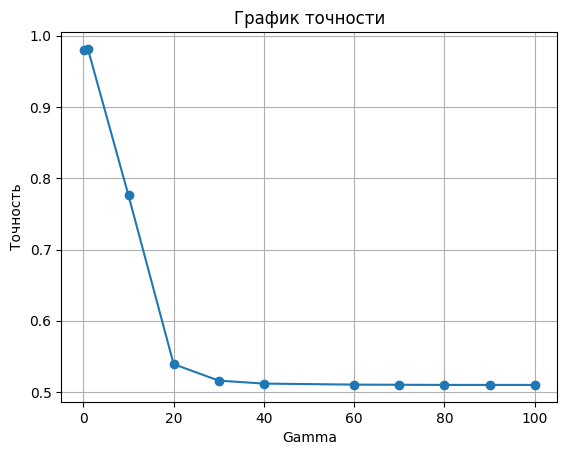

In [ ]:
param_range = [100, 90, 80, 70, 60, 40, 30, 20, 10, 1, 0.1]

mean_scores = []

# В документации написано, что с уменьшением гамма должна увеличиваться точность

for param in param_range:
    clf = SVC(gamma=param, C=1, random_state=42)

    scores = cross_val_score(clf, X_train, y_train, cv=5)

    mean_scores.append(scores.mean())

plt.plot(param_range, mean_scores, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Точность')
plt.title('График точности')
plt.grid(True)
plt.show()

2.5 Построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) для обученной модели

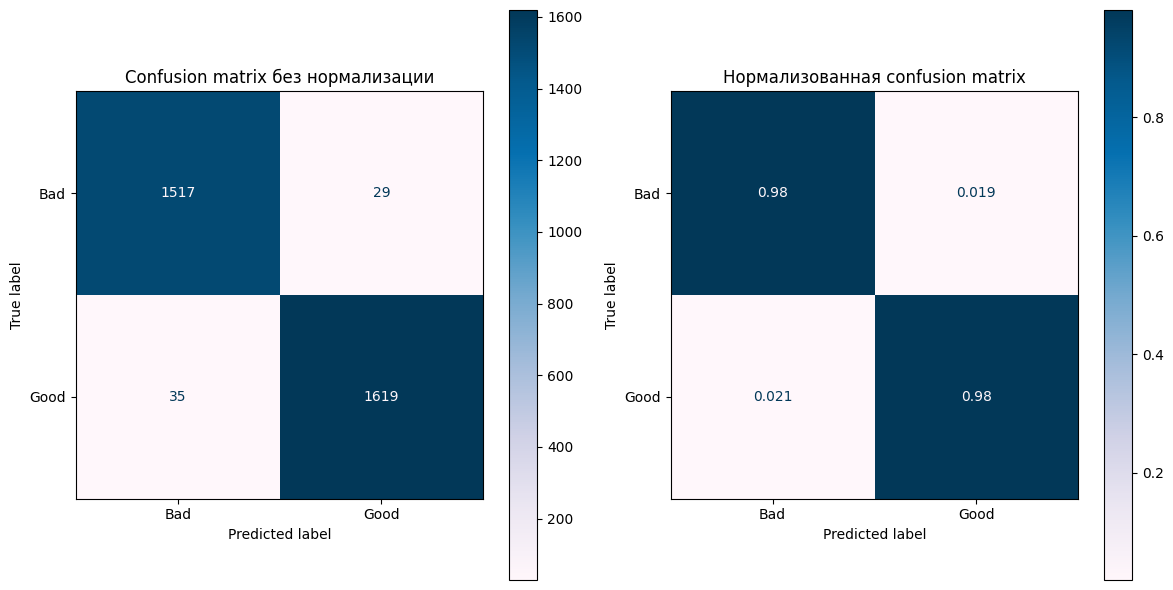

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

titles_options = [
    ("Confusion matrix без нормализации", None),
    ("Нормализованная confusion matrix", "true"),
]

for ax, (title, normalize) in zip(axs, titles_options):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize=normalize)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.PuBu, ax=ax)
    ax.set_title(title)

plt.tight_layout()

plt.show()

###Задание 3
Бинарная классификация.

3.1 Загрузить датасет для бинарной классификации или составить из существующего датасета его бинарное подмножество

In [ ]:
df_binary = df[df['Quality'].isin(['Bad', 'Good'])]
df_binary

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


3.2 Обучить на нормализованных данных любой классификатор

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

df_bin_norm = scaler_standard.fit_transform(df_binary[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']])

X = df_bin_norm[:, [2, 3]]
y = df_binary["Quality"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(algorithm="SAMME", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

3.3 Посчитать следующие метрики:


1. accuracy
2. precision
3. recall
4. f-measure

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision_good = precision_score(y_test, y_pred, pos_label='Good')
recall_good = recall_score(y_test, y_pred, pos_label='Good')
f_measure_good = f1_score(y_test, y_pred, pos_label='Good')

print("Accuracy:", accuracy)

print("Precision:", precision_good)

print("Recall:", recall_good)

print("F-measure:", f_measure_good)

Accuracy: 0.735625
Precision: 0.8666666666666667
Recall: 0.5714285714285714
F-measure: 0.6887417218543047


3.4 Составить `classification_report`

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Bad', 'Good'])

print(report)

              precision    recall  f1-score   support

         Bad       0.67      0.91      0.77       781
        Good       0.87      0.57      0.69       819

    accuracy                           0.74      1600
   macro avg       0.77      0.74      0.73      1600
weighted avg       0.77      0.74      0.73      1600

